#  6.13 Lab: Data exploration

---

<a id="learning-objectives"></a>
## Learning Objectives
*After completing this lab, you will be able to:*

- Explore and interrogate different data sets using our pandas and Plotly skills.
- Interpret the findings to understand what the data tells us about the real world.

## Contents:
* [Analysing coffee shop data](#coffee)
* [Air quality API](#air-quality)


<a id="coffee"></a>

# <font color='blue'> Coffee shop data</font>

In this Lab we'll be working with two datasets.
    
The first consists of coffee shop transactions, a dataset created by IBM and made available on [Kaggle](https://www.kaggle.com/datasets/ylchang/coffee-shop-sample-data-1113).

The data consists of coffee shop transactions in April 2019.

There are ~50,000 total transactions in the data set. The data consists of transactions from shops in New York City only.

Our task is to answer 3 questions:
1. **Which products offer the best margins?**
2. **Are particular customer groups spending more?**
3. **Which products generate the most sales?**

<br />



In [156]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [157]:
product = pd.read_csv('product.csv')

In [158]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ KB


In [159]:
product.head()
product['current_retail_price'] = (product['current_retail_price']).replace('[$]', '', regex=True).astype(float)
retail_fl = pd.to_numeric(product['current_retail_price'])
print(retail_fl)

0     18.00
1     18.00
2     14.75
3     20.45
4     15.00
      ...  
83     0.80
84     6.00
85     3.00
86     2.10
87     2.65
Name: current_retail_price, Length: 88, dtype: float64


In [160]:
product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,15.00,Y,N,N


In [161]:
retail_fl = product.sort_values('current_retail_price', ascending=False).head(n=10)

In [162]:
retail_fl

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
7,8,Whole Bean/Teas,Coffee beans,Premium Beans,Civet Cat,"The most expensive coffee in the world, the ca...",.5 lb,36.00,45.00,Y,N,N
80,81,Merchandise,Branded,Clothing,I Need My Bean! T-shirt,Stylish chic,single,8.96,28.00,N,N,N
79,80,Merchandise,Branded,Clothing,I Need My Bean! Toque,keep your head bean warm,single,7.36,23.00,N,N,N
8,9,Whole Bean/Teas,Coffee beans,Organic Beans,Organic Decaf Blend,Our blend of hand picked organic beans that ha...,1 lb,18.00,22.50,Y,N,N
5,6,Whole Bean/Teas,Coffee beans,Gourmet Beans,Ethiopia,From the home of coffee.,1 lb,16.80,21.00,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,20.45,Y,N,N
6,7,Whole Bean/Teas,Coffee beans,Premium Beans,Jamacian Coffee River,"Ya man, it will start your day off right.",1 lb,15.80,19.75,Y,N,N
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,15.00,Y,N,N


In [163]:
retail_fl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 7 to 4
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               10 non-null     int64  
 1   product_group            10 non-null     object 
 2   product_category         10 non-null     object 
 3   product_type             10 non-null     object 
 4   product                  10 non-null     object 
 5   product_description      10 non-null     object 
 6   unit_of_measure          10 non-null     object 
 7   current_wholesale_price  10 non-null     float64
 8   current_retail_price     10 non-null     float64
 9   tax_exempt_yn            10 non-null     object 
 10  promo_yn                 10 non-null     object 
 11  new_product_yn           10 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.0+ KB


In [164]:
product[['current_wholesale_price', 'current_retail_price']]

,current_wholesale_price,current_retail_price
0,14.40,18.00
1,14.40,18.00
2,11.80,14.75
3,16.36,20.45
4,12.00,15.00
...,...,...
83,0.04,0.80
84,1.20,6.00
85,0.60,3.00
86,0.42,2.10


In [165]:
#Can you now create a new column called margin which shows the difference between the wholesale price and retail price?

In [166]:
margin = product['current_retail_price'] - product['current_wholesale_price']

In [167]:
margin

0     3.60
1     3.60
2     2.95
3     4.09
4     3.00
      ... 
83    0.76
84    4.80
85    2.40
86    1.68
87    0.93
Length: 88, dtype: float64

In [168]:
product['margin'] = margin

In [169]:
product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N,3.60
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N,3.60
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,14.75,Y,N,N,2.95
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,20.45,Y,N,N,4.09
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,15.00,Y,N,N,3.00


In [170]:
#Find the highest sale price in the dataset, and the largest amount of profit.

In [171]:
product.sort_values('current_retail_price', ascending=False).head() # Highest retail price = $45.0

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin
7,8,Whole Bean/Teas,Coffee beans,Premium Beans,Civet Cat,"The most expensive coffee in the world, the ca...",.5 lb,36.00,45.0,Y,N,N,9.00
80,81,Merchandise,Branded,Clothing,I Need My Bean! T-shirt,Stylish chic,single,8.96,28.0,N,N,N,19.04
79,80,Merchandise,Branded,Clothing,I Need My Bean! Toque,keep your head bean warm,single,7.36,23.0,N,N,N,15.64
8,9,Whole Bean/Teas,Coffee beans,Organic Beans,Organic Decaf Blend,Our blend of hand picked organic beans that ha...,1 lb,18.00,22.5,Y,N,N,4.50
5,6,Whole Bean/Teas,Coffee beans,Gourmet Beans,Ethiopia,From the home of coffee.,1 lb,16.80,21.0,Y,N,N,4.20


In [172]:
product.sort_values('margin', ascending=False).head() #Largest amount of profit = $19.04

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin
80,81,Merchandise,Branded,Clothing,I Need My Bean! T-shirt,Stylish chic,single,8.96,28.0,N,N,N,19.04
79,80,Merchandise,Branded,Clothing,I Need My Bean! Toque,keep your head bean warm,single,7.36,23.0,N,N,N,15.64
82,83,Merchandise,Branded,Housewares,I Need My Bean! Latte cup,The cup and saucer set is the perfect way to e...,single,4.48,14.0,N,N,N,9.52
7,8,Whole Bean/Teas,Coffee beans,Premium Beans,Civet Cat,"The most expensive coffee in the world, the ca...",.5 lb,36.00,45.0,Y,N,N,9.00
81,82,Merchandise,Branded,Housewares,I Need My Bean! Diner mug,Classic,single,3.84,12.0,N,N,N,8.16


In [173]:
product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N,3.60
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N,3.60
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,14.75,Y,N,N,2.95
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,20.45,Y,N,N,4.09
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,15.00,Y,N,N,3.00


In [174]:
#The largest profit is significant - but it's obviously not representative of how much profit is made on each transaction on average.

#Find the mean profit per sale.

In [175]:
product['margin'].mean()

2.6931818181818183

In [176]:
product.describe()

,product_id,current_wholesale_price,current_retail_price,margin
count,88.000000,88.000000,88.000000,88.000000
mean,44.534091,3.888409,6.581591,2.693182
std,25.605293,5.649682,7.159284,2.747199
min,1.000000,0.040000,0.800000,0.750000
25%,22.750000,0.630000,3.000000,1.467500
50%,44.500000,1.195000,3.500000,1.935000
75%,66.250000,5.360000,8.950000,2.837500
max,89.000000,36.000000,45.000000,19.040000


In [177]:
#Now, let's start filtering our data by writing logical tests. How many transactions were valued above the mean transaction amount?

In [178]:
product[product['margin'] > 2.69].info() # Number of products with a margin above the mean - 24

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 84
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               24 non-null     int64  
 1   product_group            24 non-null     object 
 2   product_category         24 non-null     object 
 3   product_type             24 non-null     object 
 4   product                  24 non-null     object 
 5   product_description      24 non-null     object 
 6   unit_of_measure          24 non-null     object 
 7   current_wholesale_price  24 non-null     float64
 8   current_retail_price     24 non-null     float64
 9   tax_exempt_yn            24 non-null     object 
 10  promo_yn                 24 non-null     object 
 11  new_product_yn           24 non-null     object 
 12  margin                   24 non-null     float64
dtypes: float64(3), int64(1), object(9)
memory usage: 2.6+ KB


In [179]:
#Create a new column called profit_ratio which shows the ratio between the wholesale and retail prices.

#How many transactions made a profit of at least 2 times their wholesale cost?

In [180]:
profit_ratio = product['current_retail_price'] / product['current_wholesale_price'] 
profit_ratio

0      1.250000
1      1.250000
2      1.250000
3      1.250000
4      1.250000
        ...    
83    20.000000
84     5.000000
85     5.000000
86     5.000000
87     1.540698
Length: 88, dtype: float64

In [181]:
product['profit_ratio'] = profit_ratio
product.sort_values('profit_ratio', ascending=False).head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin,profit_ratio
62,63,Add-ons,Flavours,Regular syrup,Carmel syrup,Rich carmel taste,pump,0.04,0.80,Y,N,N,0.76,20.0
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,0.80,Y,N,N,0.76,20.0
63,64,Add-ons,Flavours,Regular syrup,Hazelnut syrup,Bursting with nutty flavour,pump,0.04,0.80,Y,N,N,0.76,20.0
64,65,Add-ons,Flavours,Sugar free syrup,Sugar Free Vanilla syrup,Our favorite,pump,0.04,0.80,Y,N,N,0.76,20.0
33,34,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,Still a front runner for good premium coffee.,8 oz,0.49,2.45,Y,N,N,1.96,5.0


In [182]:
product[(product['margin'] > product['current_wholesale_price']*2)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 21 to 86
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               49 non-null     int64  
 1   product_group            49 non-null     object 
 2   product_category         49 non-null     object 
 3   product_type             49 non-null     object 
 4   product                  49 non-null     object 
 5   product_description      49 non-null     object 
 6   unit_of_measure          49 non-null     object 
 7   current_wholesale_price  49 non-null     float64
 8   current_retail_price     49 non-null     float64
 9   tax_exempt_yn            49 non-null     object 
 10  promo_yn                 49 non-null     object 
 11  new_product_yn           49 non-null     object 
 12  margin                   49 non-null     float64
 13  profit_ratio             49 non-null     float64
dtypes: float64(4), int64(1), object(

In [183]:
product[product['profit_ratio'] > 2].info() # A total of 49 transactions had a profit of at least 2 times their wholesale cost

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 21 to 86
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               49 non-null     int64  
 1   product_group            49 non-null     object 
 2   product_category         49 non-null     object 
 3   product_type             49 non-null     object 
 4   product                  49 non-null     object 
 5   product_description      49 non-null     object 
 6   unit_of_measure          49 non-null     object 
 7   current_wholesale_price  49 non-null     float64
 8   current_retail_price     49 non-null     float64
 9   tax_exempt_yn            49 non-null     object 
 10  promo_yn                 49 non-null     object 
 11  new_product_yn           49 non-null     object 
 12  margin                   49 non-null     float64
 13  profit_ratio             49 non-null     float64
dtypes: float64(4), int64(1), object(

In [184]:
#How many transactions in the dataset were for coffee beans? You'll have to think creatively about where this information is stored in the dataset, and how to extract it.

In [185]:
product[product['product_category'] == 'Coffee beans'].info() #A total of 10 products are under the category of coffee beans. Continued below...

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               10 non-null     int64  
 1   product_group            10 non-null     object 
 2   product_category         10 non-null     object 
 3   product_type             10 non-null     object 
 4   product                  10 non-null     object 
 5   product_description      10 non-null     object 
 6   unit_of_measure          10 non-null     object 
 7   current_wholesale_price  10 non-null     float64
 8   current_retail_price     10 non-null     float64
 9   tax_exempt_yn            10 non-null     object 
 10  promo_yn                 10 non-null     object 
 11  new_product_yn           10 non-null     object 
 12  margin                   10 non-null     float64
 13  profit_ratio             10 non-null     float64
dtypes: float64(4), int64(1), object(9)

In [186]:
sales = pd.read_csv('201904 sales reciepts.csv')
sales.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [187]:
time_stamp = (sales['transaction_date'] + ' ' + sales['transaction_time'])
time_stamp

0        2019-04-01 12:04:43
1        2019-04-01 15:54:39
2        2019-04-01 14:34:59
3        2019-04-01 16:06:04
4        2019-04-01 19:18:37
                ...         
49889    2019-04-29 16:51:58
49890    2019-04-29 16:51:14
49891    2019-04-29 11:17:36
49892    2019-04-29 15:45:52
49893    2019-04-29 15:45:52
Length: 49894, dtype: object

In [188]:
sales['time_stamp'] = time_stamp
sales

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,time_stamp
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,2019-04-01 12:04:43
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N,2019-04-01 15:54:39
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N,2019-04-01 14:34:59
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N,2019-04-01 16:06:04
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N,2019-04-01 19:18:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N,2019-04-29 16:51:58
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N,2019-04-29 16:51:14
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N,2019-04-29 11:17:36
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N,2019-04-29 15:45:52


In [511]:
sales['quantity']= (sales['quantity'].astype(float))

In [513]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  float64
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
 14  time_stamp        49894 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 5.7+ MB


In [515]:
category = pd.merge(sales, product, how='inner', on = 'product_id')
category.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin,profit_ratio
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,...,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N,1.87,3.968254
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,...,Brazilian Lg,It's like Carnival in a cup. Clean and smooth.,24 oz,0.70,3.50,Y,N,N,2.80,5.000000
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,...,Serenity Green Tea Rg,Feel the stress leaving your body.,16 oz,0.63,2.50,Y,N,N,1.87,3.968254
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,...,Our Old Time Diner Blend Rg,An honest cup a coffee.,16 oz,0.50,2.50,Y,N,N,2.00,5.000000
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,...,Jamaican Coffee River Sm,Still a front runner for good premium coffee.,8 oz,0.49,2.45,Y,N,N,1.96,5.000000


In [517]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           49894 non-null  int64  
 1   transaction_date         49894 non-null  object 
 2   transaction_time         49894 non-null  object 
 3   sales_outlet_id          49894 non-null  int64  
 4   staff_id                 49894 non-null  int64  
 5   customer_id              49894 non-null  int64  
 6   instore_yn               49894 non-null  object 
 7   order                    49894 non-null  int64  
 8   line_item_id             49894 non-null  int64  
 9   product_id               49894 non-null  int64  
 10  quantity                 49894 non-null  float64
 11  line_item_amount         49894 non-null  float64
 12  unit_price               49894 non-null  float64
 13  promo_item_yn            49894 non-null  object 
 14  time_stamp            

In [192]:
fd = pd.DataFrame(category)

In [193]:
coffee = fd.loc[category['product_category'] == 'Coffee beans'] # There were 587 sales of coffee beans.
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587 entries, 10194 to 46281
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           587 non-null    int64  
 1   transaction_date         587 non-null    object 
 2   transaction_time         587 non-null    object 
 3   sales_outlet_id          587 non-null    int64  
 4   staff_id                 587 non-null    int64  
 5   customer_id              587 non-null    int64  
 6   instore_yn               587 non-null    object 
 7   order                    587 non-null    int64  
 8   line_item_id             587 non-null    int64  
 9   product_id               587 non-null    int64  
 10  quantity                 587 non-null    int64  
 11  line_item_amount         587 non-null    float64
 12  unit_price               587 non-null    float64
 13  promo_item_yn            587 non-null    object 
 14  time_stamp               

In [194]:
#Sort the dataset in ascending order of profit, to find the transaction that generated the highest profit.

In [195]:
sales.sort_values('time_stamp').head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,time_stamp
659,390,2019-04-01,07:01:20,5,12,5658,Y,1,1,22,2,4.0,2.0,N,2019-04-01 07:01:20
1087,2465,2019-04-01,07:02:34,5,12,5163,Y,1,1,30,2,6.0,3.0,N,2019-04-01 07:02:34
827,1228,2019-04-01,07:02:56,5,30,5197,N,1,1,22,1,2.0,2.0,N,2019-04-01 07:02:56
904,1644,2019-04-01,07:03:30,5,12,5247,Y,1,1,22,2,4.0,2.0,N,2019-04-01 07:03:30
775,1034,2019-04-01,07:04:24,5,30,5333,N,1,1,37,1,3.0,3.0,N,2019-04-01 07:04:24


In [196]:
transactions = sales.groupby('time_stamp')[['transaction_id', 'quantity', 'unit_price']].sum()
transactions.sort_values('transaction_id', ascending=True).head()

,transaction_id,quantity,unit_price
time_stamp,,,
2019-04-10 10:18:16,1,2,2.5
2019-04-14 08:45:04,1,1,2.5
2019-04-07 07:08:39,1,2,2.2
2019-04-11 06:23:18,1,1,2.5
2019-04-12 08:35:19,1,1,3.0


In [197]:
highest_profit = transactions['quantity'] * transactions['unit_price']
highest_profit.head()

time_stamp
2019-04-01 07:01:20    4.0
2019-04-01 07:02:34    6.0
2019-04-01 07:02:56    2.0
2019-04-01 07:03:30    4.0
2019-04-01 07:04:24    3.0
dtype: float64

In [198]:
transactions['highest_profit'] = highest_profit
transactions.sort_values('highest_profit', ascending=False).head() # Transactions #568 on 4-17-2009 and #708 on 4-17-2009 produced the highest profits

,transaction_id,quantity,unit_price,highest_profit
time_stamp,,,,
2019-04-17 11:18:31,568,11,53.60,589.6
2019-04-17 10:41:11,708,11,53.60,589.6
2019-04-17 09:55:47,4275,10,50.35,503.5
2019-04-17 09:05:20,3063,10,50.35,503.5
2019-04-09 07:11:25,759,14,28.45,398.3


In [199]:
customer = pd.read_csv('customer.csv') # Particular customers spending more?
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.1+ KB


In [200]:
customer

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951
...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990


In [201]:
generations = pd.read_csv('generations.csv')
generations.head()

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


In [202]:
generations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     int64 
 1   generation  70 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [203]:
df = pd.DataFrame(generations)

In [204]:
customer_spend = pd.merge(customer, generations, how = 'inner', on = 'birth_year') #JOIN
customer_spend.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,Baby Boomers
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,Baby Boomers
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,Baby Boomers
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,Baby Boomers
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,Baby Boomers


In [205]:
customer_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
 9   generation           2246 non-null   object
dtypes: int64(3), object(7)
memory usage: 175.6+ KB


In [206]:
customer_spend['generation'].value_counts()

generation
Baby Boomers           529
Gen X                  522
Older Millennials      515
Gen Z                  382
Younger Millennials    298
Name: count, dtype: int64

In [519]:
spend = pd.merge(customer_spend, sales, how = 'inner', on = 'customer_id')

In [585]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24852 entries, 0 to 24851
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          24852 non-null  int64  
 1   home_store           24852 non-null  int64  
 2   customer_first-name  24852 non-null  object 
 3   customer_email       24852 non-null  object 
 4   customer_since       24852 non-null  object 
 5   loyalty_card_number  24852 non-null  object 
 6   birthdate            24852 non-null  object 
 7   gender               24852 non-null  object 
 8   birth_year           24852 non-null  int64  
 9   generation           24852 non-null  object 
 10  transaction_id       24852 non-null  int64  
 11  transaction_date     24852 non-null  object 
 12  transaction_time     24852 non-null  object 
 13  sales_outlet_id      24852 non-null  int64  
 14  staff_id             24852 non-null  int64  
 15  instore_yn           24852 non-null 

In [523]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24852 entries, 0 to 24851
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          24852 non-null  int64  
 1   home_store           24852 non-null  int64  
 2   customer_first-name  24852 non-null  object 
 3   customer_email       24852 non-null  object 
 4   customer_since       24852 non-null  object 
 5   loyalty_card_number  24852 non-null  object 
 6   birthdate            24852 non-null  object 
 7   gender               24852 non-null  object 
 8   birth_year           24852 non-null  int64  
 9   generation           24852 non-null  object 
 10  transaction_id       24852 non-null  int64  
 11  transaction_date     24852 non-null  object 
 12  transaction_time     24852 non-null  object 
 13  sales_outlet_id      24852 non-null  int64  
 14  staff_id             24852 non-null  int64  
 15  instore_yn           24852 non-null 

In [536]:
profits = pd.merge(product, sales, how = 'inner', on = 'product_id')
profits.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,...,staff_id,customer_id,instore_yn,order,line_item_id,quantity,line_item_amount,unit_price,promo_item_yn,time_stamp
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.4,18.0,Y,...,42,0,Y,6,1,1.0,18.0,18.0,N,2019-04-07 09:44:57
1,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.4,18.0,Y,...,8,709,Y,1,6,1.0,18.0,18.0,N,2019-04-08 17:48:46
2,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.4,18.0,Y,...,25,5438,Y,2,2,1.0,18.0,18.0,N,2019-04-08 07:30:17
3,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.4,18.0,Y,...,26,5026,Y,2,2,2.0,36.0,18.0,N,2019-04-08 09:13:06
4,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.4,18.0,Y,...,26,5489,Y,2,2,1.0,18.0,18.0,N,2019-04-08 10:54:04


In [541]:
margin = profits['current_retail_price'] - profits['current_wholesale_price']
margin = profits['margin']
profits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               49894 non-null  int64  
 1   product_group            49894 non-null  object 
 2   product_category         49894 non-null  object 
 3   product_type             49894 non-null  object 
 4   product                  49894 non-null  object 
 5   product_description      49894 non-null  object 
 6   unit_of_measure          49894 non-null  object 
 7   current_wholesale_price  49894 non-null  float64
 8   current_retail_price     49894 non-null  float64
 9   tax_exempt_yn            49894 non-null  object 
 10  promo_yn                 49894 non-null  object 
 11  new_product_yn           49894 non-null  object 
 12  margin                   49894 non-null  float64
 13  profit_ratio             49894 non-null  float64
 14  transaction_id        

In [547]:
gen_profits = pd.merge(customer_spend, profits, how = 'inner', on = 'customer_id')
gen_profits.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,generation,...,sales_outlet_id,staff_id,instore_yn,order,line_item_id,quantity,line_item_amount,unit_price,promo_item_yn,time_stamp
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,Baby Boomers,...,3,14,Y,1,1,1.0,2.5,2.5,N,2019-04-26 07:28:50
1,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,Baby Boomers,...,3,14,N,1,1,2.0,4.0,2.0,N,2019-04-15 08:53:26
2,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,Baby Boomers,...,3,14,N,1,1,2.0,4.0,2.0,N,2019-04-19 08:53:26
3,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,Baby Boomers,...,3,12,Y,1,1,1.0,3.0,3.0,N,2019-04-02 15:14:47
4,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,Baby Boomers,...,3,17,N,1,1,1.0,3.0,3.0,N,2019-04-03 15:01:44


In [549]:
group = gen_profits.groupby('generation')[['quantity', 'margin']].sum()
group

,quantity,margin
generation,,
Baby Boomers,8550.0,12139.82
Gen X,8244.0,11524.40
Gen Z,6196.0,8637.40
Older Millennials,7837.0,11155.70
Younger Millennials,4847.0,6835.17


In [551]:
group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Baby Boomers to Younger Millennials
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  5 non-null      float64
 1   margin    5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


In [553]:
final = group['quantity'] * group['margin']

In [555]:
final # Baby boomers are spending more

generation
Baby Boomers           1.037955e+08
Gen X                  9.500715e+07
Gen Z                  5.351733e+07
Older Millennials      8.742722e+07
Younger Millennials    3.313007e+07
dtype: float64

In [557]:
final.info()

<class 'pandas.core.series.Series'>
Index: 5 entries, Baby Boomers to Younger Millennials
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 252.0+ bytes


In [559]:
group['profit'] = final
group

,quantity,margin,profit
generation,,,
Baby Boomers,8550.0,12139.82,1.037955e+08
Gen X,8244.0,11524.40,9.500715e+07
Gen Z,6196.0,8637.40,5.351733e+07
Older Millennials,7837.0,11155.70,8.742722e+07
Younger Millennials,4847.0,6835.17,3.313007e+07


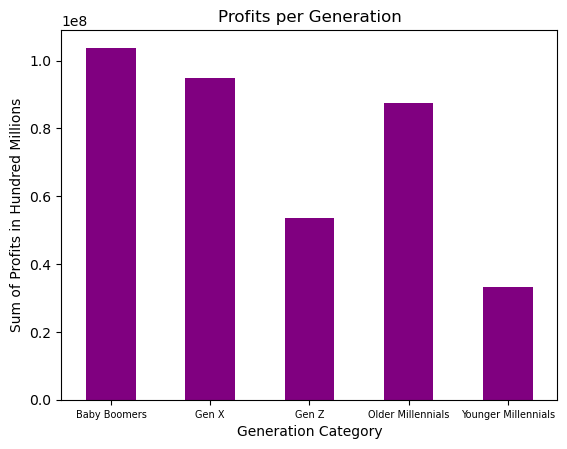

In [561]:

fig, ax = plt.subplots()
group.groupby(['generation'])['profit'].sum().plot(ax=ax, kind='bar', color = 'purple')
plt.title('Profits per Generation')
plt.xticks(rotation = 0, fontsize = 7)
plt.xlabel('Generation Category')
plt.ylabel('Sum of Profits in Hundred Millions')
plt.show()

In [525]:
sales.head() # Which products generate the most sales?

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,time_stamp
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1.0,2.50,2.50,N,2019-04-01 12:04:43
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2.0,7.00,3.50,N,2019-04-01 15:54:39
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2.0,5.00,2.50,N,2019-04-01 14:34:59
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2.0,5.00,2.50,N,2019-04-01 16:06:04
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1.0,2.45,2.45,N,2019-04-01 19:18:37


In [527]:
product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin,profit_ratio
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N,3.60,1.25
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N,3.60,1.25
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,14.75,Y,N,N,2.95,1.25
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,20.45,Y,N,N,4.09,1.25
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,15.00,Y,N,N,3.00,1.25


In [219]:
category.head() #Reminder: category = product + sales

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin,profit_ratio
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,...,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N,1.87,3.968254
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,...,Brazilian Lg,It's like Carnival in a cup. Clean and smooth.,24 oz,0.70,3.50,Y,N,N,2.80,5.000000
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,...,Serenity Green Tea Rg,Feel the stress leaving your body.,16 oz,0.63,2.50,Y,N,N,1.87,3.968254
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,...,Our Old Time Diner Blend Rg,An honest cup a coffee.,16 oz,0.50,2.50,Y,N,N,2.00,5.000000
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,...,Jamaican Coffee River Sm,Still a front runner for good premium coffee.,8 oz,0.49,2.45,Y,N,N,1.96,5.000000


In [220]:
category['product'].nunique()

80

In [221]:
most_sales = category.groupby('product')[['quantity', 'line_item_id']].sum()
most_sales.sort_values('quantity', ascending=False)

,quantity,line_item_id
product,,
Earl Grey Rg,1558,1017
Dark chocolate Lg,1546,1007
Latte,1531,1007
Morning Sunrise Chai Rg,1513,994
Ethiopia Rg,1506,979
...,...,...
Guatemalan Sustainably Grown,48,78
Primo Espresso Roast,47,64
Peppermint,45,91


In [222]:
most_profits1 = category[['transaction_id', 'time_stamp', 'product_type', 'product_group', 'product', 'quantity', 'unit_price','margin']]
most_profits1.head()

,transaction_id,time_stamp,product_type,product_group,product,quantity,unit_price,margin
0,7,2019-04-01 12:04:43,Brewed Chai tea,Beverages,Traditional Blend Chai Rg,1,2.50,1.87
1,11,2019-04-01 15:54:39,Organic brewed coffee,Beverages,Brazilian Lg,2,3.50,2.80
2,19,2019-04-01 14:34:59,Brewed Green tea,Beverages,Serenity Green Tea Rg,2,2.50,1.87
3,32,2019-04-01 16:06:04,Drip coffee,Beverages,Our Old Time Diner Blend Rg,2,2.50,2.00
4,33,2019-04-01 19:18:37,Premium brewed coffee,Beverages,Jamaican Coffee River Sm,1,2.45,1.96


In [223]:
most_profits1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  49894 non-null  int64  
 1   time_stamp      49894 non-null  object 
 2   product_type    49894 non-null  object 
 3   product_group   49894 non-null  object 
 4   product         49894 non-null  object 
 5   quantity        49894 non-null  int64  
 6   unit_price      49894 non-null  float64
 7   margin          49894 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.0+ MB


In [224]:
most_profits2 = category[['product_type', 'product_group', 'product', 'quantity', 'unit_price','margin']]
most_profits2.head()

,product_type,product_group,product,quantity,unit_price,margin
0,Brewed Chai tea,Beverages,Traditional Blend Chai Rg,1,2.50,1.87
1,Organic brewed coffee,Beverages,Brazilian Lg,2,3.50,2.80
2,Brewed Green tea,Beverages,Serenity Green Tea Rg,2,2.50,1.87
3,Drip coffee,Beverages,Our Old Time Diner Blend Rg,2,2.50,2.00
4,Premium brewed coffee,Beverages,Jamaican Coffee River Sm,1,2.45,1.96


In [225]:
most_profits2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_type   49894 non-null  object 
 1   product_group  49894 non-null  object 
 2   product        49894 non-null  object 
 3   quantity       49894 non-null  int64  
 4   unit_price     49894 non-null  float64
 5   margin         49894 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [509]:
most_profits2.groupby('product_group')[['margin', 'quantity']].count()# the products that generate the most profit
most_profits2.sort_values('margin', ascending=False).head(n=10)

,product_type,product_group,product,quantity,unit_price,margin
27916,Clothing,Merchandise,I Need My Bean! T-shirt,1,28.0,19.04
26625,Clothing,Merchandise,I Need My Bean! T-shirt,1,28.0,19.04
45652,Clothing,Merchandise,I Need My Bean! T-shirt,1,28.0,19.04
27568,Clothing,Merchandise,I Need My Bean! T-shirt,1,28.0,19.04
17183,Clothing,Merchandise,I Need My Bean! T-shirt,1,28.0,19.04
27601,Clothing,Merchandise,I Need My Bean! T-shirt,1,28.0,19.04
16789,Clothing,Merchandise,I Need My Bean! T-shirt,1,28.0,19.04
27720,Clothing,Merchandise,I Need My Bean! T-shirt,1,28.0,19.04
22331,Clothing,Merchandise,I Need My Bean! T-shirt,1,28.0,19.04
27966,Clothing,Merchandise,I Need My Bean! T-shirt,1,28.0,19.04


In [227]:
#How many transactions were for the "Food" and "Beverages" categories in the dataset?

In [228]:
x = most_profits2['product_group'].value_counts() # how many transactions per product group
x

product_group
Beverages          38646
Food                7616
Add-ons             2248
Whole Bean/Teas     1139
Merchandise          245
Name: count, dtype: int64

In [229]:
y = most_profits2.groupby('product_group')['margin'].mean() #What kinds of prodcuts generate the most profit
y

product_group
Add-ons             0.760000
Beverages           2.166456
Food                1.241295
Merchandise        12.206694
Whole Bean/Teas     3.072037
Name: margin, dtype: float64

In [230]:
type(y)

pandas.core.series.Series

In [231]:
z = x * y # The product group that brought in the most profits was beverages. 
z

product_group
Add-ons             1708.48
Beverages          83724.84
Food                9453.70
Merchandise         2990.64
Whole Bean/Teas     3499.05
dtype: float64

In [232]:
# Creating a dictionary by passing Series objects as values
frame = {
        'Count': x,
        'Margin': y,
        'Profit' : z
        }
 
# Creating DataFrame by passing Dictionary
result = pd.DataFrame(frame)
 
# Printing elements of Dataframe
result

,Count,Margin,Profit
product_group,,,
Add-ons,2248,0.760000,1708.48
Beverages,38646,2.166456,83724.84
Food,7616,1.241295,9453.70
Merchandise,245,12.206694,2990.64
Whole Bean/Teas,1139,3.072037,3499.05


In [233]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Add-ons to Whole Bean/Teas
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   5 non-null      int64  
 1   Margin  5 non-null      float64
 2   Profit  5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 160.0+ bytes


In [234]:
result.to_csv('lab6.13/categorical_profit.csv', sep = ',', index = True) 

In [235]:
categorical_profits = pd.read_csv('categorical_profit.csv')
categorical_profits

,product_group,Count,Margin,Profit
0,Add-ons,2248,0.760000,1708.48
1,Beverages,38646,2.166456,83724.84
2,Food,7616,1.241295,9453.70
3,Merchandise,245,12.206694,2990.64
4,Whole Bean/Teas,1139,3.072037,3499.05


In [465]:
average_profit = categorical_profits['Profit']
average_profit.sum()

101376.70999999999

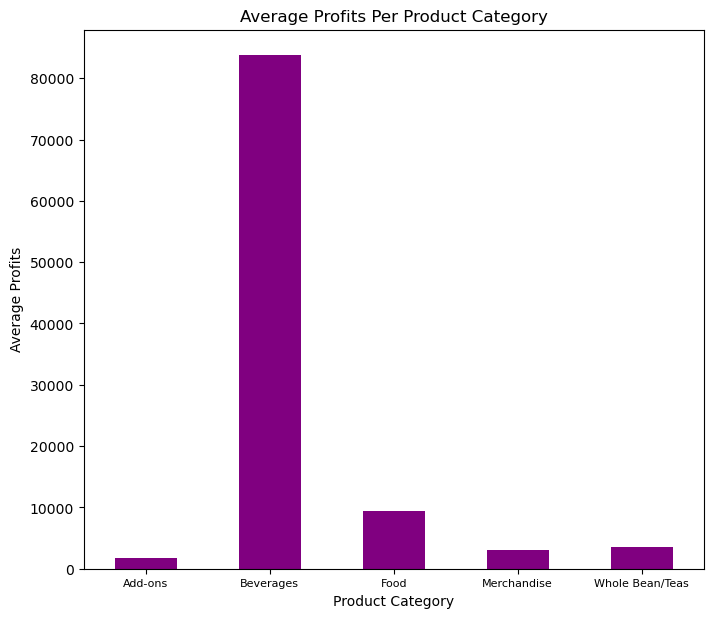

In [471]:
plt.figure(figsize = (8, 7))
categorical_profits.groupby('product_group')['Profit'].sum().plot(kind='bar', color = 'purple')
plt.xticks(rotation = 0, fontsize = 8)

plt.xlabel('Product Category')
plt.ylabel('Average Profits')
plt.title('Average Profits Per Product Category')
plt.show()

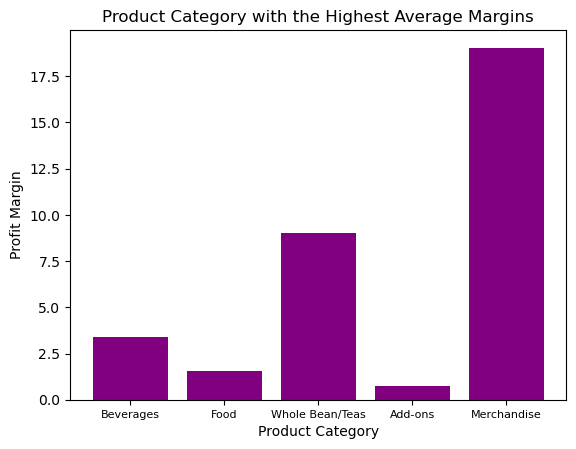

In [475]:
#type of chart
plt.bar(most_profits2['product_group'], most_profits2['margin'], color = 'purple')
plt.xticks(rotation = 0, fontsize = 8)
plt.xlabel('Product Category')
plt.ylabel('Profit Margin')
plt.title('Product Category with the Highest Average Margins')
plt.show()

In [595]:
sales

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,time_stamp
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1.0,2.50,2.50,N,2019-04-01 12:04:43
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2.0,7.00,3.50,N,2019-04-01 15:54:39
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2.0,5.00,2.50,N,2019-04-01 14:34:59
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2.0,5.00,2.50,N,2019-04-01 16:06:04
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1.0,2.45,2.45,N,2019-04-01 19:18:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1.0,3.00,3.00,N,2019-04-29 16:51:58
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2.0,4.40,2.20,N,2019-04-29 16:51:14
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1.0,2.20,2.20,N,2019-04-29 11:17:36
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2.0,5.00,2.50,N,2019-04-29 15:45:52


In [357]:
category.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin,profit_ratio
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,...,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N,1.87,3.968254
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,...,Brazilian Lg,It's like Carnival in a cup. Clean and smooth.,24 oz,0.70,3.50,Y,N,N,2.80,5.000000
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,...,Serenity Green Tea Rg,Feel the stress leaving your body.,16 oz,0.63,2.50,Y,N,N,1.87,3.968254
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,...,Our Old Time Diner Blend Rg,An honest cup a coffee.,16 oz,0.50,2.50,Y,N,N,2.00,5.000000
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,...,Jamaican Coffee River Sm,Still a front runner for good premium coffee.,8 oz,0.49,2.45,Y,N,N,1.96,5.000000


In [565]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           49894 non-null  int64  
 1   transaction_date         49894 non-null  object 
 2   transaction_time         49894 non-null  object 
 3   sales_outlet_id          49894 non-null  int64  
 4   staff_id                 49894 non-null  int64  
 5   customer_id              49894 non-null  int64  
 6   instore_yn               49894 non-null  object 
 7   order                    49894 non-null  int64  
 8   line_item_id             49894 non-null  int64  
 9   product_id               49894 non-null  int64  
 10  quantity                 49894 non-null  float64
 11  line_item_amount         49894 non-null  float64
 12  unit_price               49894 non-null  float64
 13  promo_item_yn            49894 non-null  object 
 14  time_stamp            

In [587]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24852 entries, 0 to 24851
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          24852 non-null  int64  
 1   home_store           24852 non-null  int64  
 2   customer_first-name  24852 non-null  object 
 3   customer_email       24852 non-null  object 
 4   customer_since       24852 non-null  object 
 5   loyalty_card_number  24852 non-null  object 
 6   birthdate            24852 non-null  object 
 7   gender               24852 non-null  object 
 8   birth_year           24852 non-null  int64  
 9   generation           24852 non-null  object 
 10  transaction_id       24852 non-null  int64  
 11  transaction_date     24852 non-null  object 
 12  transaction_time     24852 non-null  object 
 13  sales_outlet_id      24852 non-null  int64  
 14  staff_id             24852 non-null  int64  
 15  instore_yn           24852 non-null 

In [361]:
no_cust_id = category[category['customer_id'] == 0]

In [363]:
no_cust_id

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin,profit_ratio
3854,2356,2019-04-03,11:46:54,3,12,0,N,1,1,22,...,Our Old Time Diner Blend Sm,An honest cup a coffee.,8 oz,0.40,2.00,Y,N,N,1.60,5.000000
3855,2356,2019-04-03,11:46:54,3,12,0,N,1,5,77,...,Oatmeal Scone,Grannys fav,single,1.95,3.00,N,N,N,1.05,1.538462
5509,2337,2019-04-04,16:20:11,3,17,0,N,1,1,55,...,Morning Sunrise Chai Lg,Face the morning after your yoga routine.,24 oz,1.00,4.00,Y,N,N,3.00,4.000000
10191,4,2019-04-07,10:26:52,5,29,0,N,1,1,33,...,Ethiopia Lg,A bold cup when you want that something extra.,24 oz,0.70,3.50,Y,N,N,2.80,5.000000
10192,5,2019-04-07,09:59:06,5,29,0,Y,1,1,42,...,Lemon Grass Rg,You will think you are in Thailand.,16 oz,0.63,2.50,Y,N,N,1.87,3.968254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49885,746,2019-04-29,15:54:11,8,15,0,N,1,1,37,...,Espresso shot,You will think you are in Venice when you sip ...,1.5 oz,0.60,3.00,Y,N,N,2.40,5.000000
49886,746,2019-04-29,15:54:11,8,15,0,N,1,5,71,...,Chocolate Croissant,Chocolate flakes,single,2.44,3.75,N,N,N,1.31,1.536885
49887,749,2019-04-29,19:34:50,8,15,0,N,1,1,47,...,Serenity Green Tea Lg,Feel the stress leaving your body.,24 oz,0.75,3.00,Y,N,N,2.25,4.000000
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,...,Columbian Medium Roast Lg,A smooth cup of coffee any time of day.,24 oz,0.60,3.00,Y,N,N,2.40,5.000000


In [365]:
no_cust_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25033 entries, 3854 to 49891
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           25033 non-null  int64  
 1   transaction_date         25033 non-null  object 
 2   transaction_time         25033 non-null  object 
 3   sales_outlet_id          25033 non-null  int64  
 4   staff_id                 25033 non-null  int64  
 5   customer_id              25033 non-null  int64  
 6   instore_yn               25033 non-null  object 
 7   order                    25033 non-null  int64  
 8   line_item_id             25033 non-null  int64  
 9   product_id               25033 non-null  int64  
 10  quantity                 25033 non-null  int64  
 11  line_item_amount         25033 non-null  float64
 12  unit_price               25033 non-null  float64
 13  promo_item_yn            25033 non-null  object 
 14  time_stamp              

In [371]:
ncisum = no_cust_id['quantity'] * no_cust_id['margin']

In [459]:
ncisum.sum()

74132.34

In [375]:
yes_cust_id = category[category['customer_id'] != 0]

In [377]:
yes_cust_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24861 entries, 0 to 49893
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           24861 non-null  int64  
 1   transaction_date         24861 non-null  object 
 2   transaction_time         24861 non-null  object 
 3   sales_outlet_id          24861 non-null  int64  
 4   staff_id                 24861 non-null  int64  
 5   customer_id              24861 non-null  int64  
 6   instore_yn               24861 non-null  object 
 7   order                    24861 non-null  int64  
 8   line_item_id             24861 non-null  int64  
 9   product_id               24861 non-null  int64  
 10  quantity                 24861 non-null  int64  
 11  line_item_amount         24861 non-null  float64
 12  unit_price               24861 non-null  float64
 13  promo_item_yn            24861 non-null  object 
 14  time_stamp               24

In [379]:
ycisum = yes_cust_id['quantity'] * yes_cust_id['margin']
ycisum.sum()

72992.45

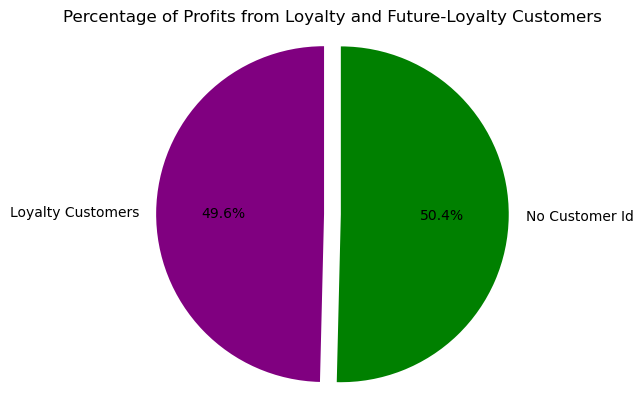

In [383]:
labels = 'Loyalty Customers', 'No Customer Id'
sizes = [72992.45, 74132.34]
colors = ['purple', 'green']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Profits from Loyalty and Future-Loyalty Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [583]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           49894 non-null  int64  
 1   transaction_date         49894 non-null  object 
 2   transaction_time         49894 non-null  object 
 3   sales_outlet_id          49894 non-null  int64  
 4   staff_id                 49894 non-null  int64  
 5   customer_id              49894 non-null  int64  
 6   instore_yn               49894 non-null  object 
 7   order                    49894 non-null  int64  
 8   line_item_id             49894 non-null  int64  
 9   product_id               49894 non-null  int64  
 10  quantity                 49894 non-null  float64
 11  line_item_amount         49894 non-null  float64
 12  unit_price               49894 non-null  float64
 13  promo_item_yn            49894 non-null  object 
 14  time_stamp            

In [589]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24852 entries, 0 to 24851
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          24852 non-null  int64  
 1   home_store           24852 non-null  int64  
 2   customer_first-name  24852 non-null  object 
 3   customer_email       24852 non-null  object 
 4   customer_since       24852 non-null  object 
 5   loyalty_card_number  24852 non-null  object 
 6   birthdate            24852 non-null  object 
 7   gender               24852 non-null  object 
 8   birth_year           24852 non-null  int64  
 9   generation           24852 non-null  object 
 10  transaction_id       24852 non-null  int64  
 11  transaction_date     24852 non-null  object 
 12  transaction_time     24852 non-null  object 
 13  sales_outlet_id      24852 non-null  int64  
 14  staff_id             24852 non-null  int64  
 15  instore_yn           24852 non-null 

In [250]:
category.head() #sales + products

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,margin,profit_ratio
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,...,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N,1.87,3.968254
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,...,Brazilian Lg,It's like Carnival in a cup. Clean and smooth.,24 oz,0.70,3.50,Y,N,N,2.80,5.000000
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,...,Serenity Green Tea Rg,Feel the stress leaving your body.,16 oz,0.63,2.50,Y,N,N,1.87,3.968254
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,...,Our Old Time Diner Blend Rg,An honest cup a coffee.,16 oz,0.50,2.50,Y,N,N,2.00,5.000000
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,...,Jamaican Coffee River Sm,Still a front runner for good premium coffee.,8 oz,0.49,2.45,Y,N,N,1.96,5.000000


In [481]:
no_id_sales = no_cust_id.groupby('product_group')[['quantity', 'margin']].sum() # How many transactions were from customers without a loyalty id by product group
no_id_sales.sort_values('quantity', ascending=False)

,quantity,margin
product_group,,
Beverages,29050,40987.93
Food,3894,4766.51
Add-ons,2233,1114.16
Whole Bean/Teas,721,2188.92
Merchandise,172,2008.72


In [483]:
yes_id_sales = yes_cust_id.groupby('product_group')[['quantity', 'margin']].sum() # How many transaction are from customers with a loyalty id by product group
yes_id_sales.sort_values('quantity', ascending=False)

,quantity,margin
product_group,,
Beverages,30055,42736.91
Food,3870,4687.19
Add-ons,1233,594.32
Whole Bean/Teas,447,1310.13
Merchandise,83,981.92


In [485]:
no_id_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Add-ons to Whole Bean/Teas
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  5 non-null      int64  
 1   margin    5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 120.0+ bytes


In [487]:
no_id_sales['quantity']= (no_id_sales['quantity'].astype(float))
no_id_sales['margin']= (no_id_sales['margin'].astype(float))
no_id_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Add-ons to Whole Bean/Teas
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  5 non-null      float64
 1   margin    5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


In [489]:
yes_id_sales['quantity']= (yes_id_sales['quantity'].astype(float))
yes_id_sales['margin']= (yes_id_sales['margin'].astype(float))
yes_id_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Add-ons to Whole Bean/Teas
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  5 non-null      float64
 1   margin    5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


In [491]:
non_profit = no_id_sales['margin'] * no_id_sales['quantity']
loy_profit = yes_id_sales['margin'] * yes_id_sales['quantity']

In [493]:
no_id_sales['profit'] = non_profit
yes_id_sales['profit'] = loy_profit

In [495]:
no_id_sales

,quantity,margin,profit
product_group,,,
Add-ons,2233.0,1114.16,2.487919e+06
Beverages,29050.0,40987.93,1.190699e+09
Food,3894.0,4766.51,1.856079e+07
Merchandise,172.0,2008.72,3.454998e+05
Whole Bean/Teas,721.0,2188.92,1.578211e+06


In [497]:
yes_id_sales

,quantity,margin,profit
product_group,,,
Add-ons,1233.0,594.32,7.327966e+05
Beverages,30055.0,42736.91,1.284458e+09
Food,3870.0,4687.19,1.813943e+07
Merchandise,83.0,981.92,8.149936e+04
Whole Bean/Teas,447.0,1310.13,5.856281e+05


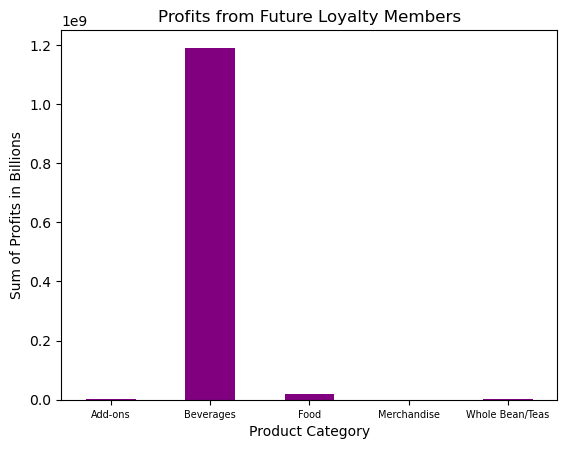

In [503]:
fig, ax = plt.subplots()
no_id_sales.groupby(['product_group'])['profit'].sum().plot(ax=ax, kind='bar', color = 'purple')
plt.title('Profits from Future Loyalty Members')
plt.xticks(rotation = 0, fontsize = 7)
plt.xlabel('Product Category')
plt.ylabel('Sum of Profits in Billions')
plt.show()


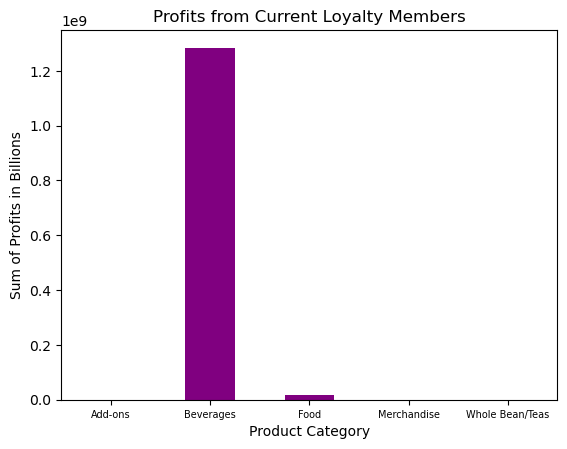

In [505]:
fig, ax = plt.subplots()
yes_id_sales.groupby(['product_group'])['profit'].sum().plot(ax=ax, kind='bar', color = 'purple')
plt.title('Profits from Current Loyalty Members')
plt.xticks(rotation = 0, fontsize = 7)
plt.xlabel('Product Category')
plt.ylabel('Sum of Profits in Billions')
plt.show()


In [591]:
customer_category = pd.merge(category, spend, how='inner', on = 'customer_id')
customer_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327332 entries, 0 to 327331
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id_x         327332 non-null  int64  
 1   transaction_date_x       327332 non-null  object 
 2   transaction_time_x       327332 non-null  object 
 3   sales_outlet_id_x        327332 non-null  int64  
 4   staff_id_x               327332 non-null  int64  
 5   customer_id              327332 non-null  int64  
 6   instore_yn_x             327332 non-null  object 
 7   order_x                  327332 non-null  int64  
 8   line_item_id_x           327332 non-null  int64  
 9   product_id_x             327332 non-null  int64  
 10  quantity_x               327332 non-null  float64
 11  line_item_amount_x       327332 non-null  float64
 12  unit_price_x             327332 non-null  float64
 13  promo_item_yn_x          327332 non-null  object 
 14  time

In [593]:
generation_loyalty = customer_category[customer_category['customer_id'] == 0]
generation_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id_x         0 non-null      int64  
 1   transaction_date_x       0 non-null      object 
 2   transaction_time_x       0 non-null      object 
 3   sales_outlet_id_x        0 non-null      int64  
 4   staff_id_x               0 non-null      int64  
 5   customer_id              0 non-null      int64  
 6   instore_yn_x             0 non-null      object 
 7   order_x                  0 non-null      int64  
 8   line_item_id_x           0 non-null      int64  
 9   product_id_x             0 non-null      int64  
 10  quantity_x               0 non-null      float64
 11  line_item_amount_x       0 non-null      float64
 12  unit_price_x             0 non-null      float64
 13  promo_item_yn_x          0 non-null      object 
 14  time_stamp_x             0 non-null      ob

In [1010]:
in_store = sales[sales['instore_yn'] == 'Y']
in_store

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,time_stamp
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N,2019-04-01 14:34:59
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N,2019-04-01 19:18:37
5,39,2019-04-01,18:54:46,3,17,664,Y,1,1,32,1,3.00,3.00,N,2019-04-01 18:54:46
8,59,2019-04-01,19:30:55,3,12,370,Y,1,1,51,2,6.00,3.00,N,2019-04-01 19:30:55
9,62,2019-04-01,12:01:00,3,12,180,Y,1,1,49,2,6.00,3.00,N,2019-04-01 12:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49878,729,2019-04-29,15:14:13,8,45,8107,Y,1,1,87,1,2.10,2.10,Y,2019-04-29 15:14:13
49880,736,2019-04-29,14:39:55,8,15,0,Y,1,1,38,1,3.75,3.75,N,2019-04-29 14:39:55
49882,740,2019-04-29,08:16:20,8,15,8026,Y,1,1,41,1,4.25,4.25,N,2019-04-29 08:16:20
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N,2019-04-29 16:51:14


In [1014]:
out_store = sales[sales['instore_yn'] == 'N']
out_store

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,time_stamp
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,2019-04-01 12:04:43
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N,2019-04-01 15:54:39
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N,2019-04-01 16:06:04
6,50,2019-04-01,13:03:49,3,12,316,N,1,1,49,2,6.00,3.00,N,2019-04-01 13:03:49
7,53,2019-04-01,11:21:14,3,12,38,N,1,1,60,1,3.75,3.75,N,2019-04-01 11:21:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49887,749,2019-04-29,19:34:50,8,15,0,N,1,1,47,1,3.00,3.00,N,2019-04-29 19:34:50
49888,752,2019-04-29,16:36:24,8,42,8401,N,1,1,87,1,2.10,2.10,Y,2019-04-29 16:36:24
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N,2019-04-29 16:51:58
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N,2019-04-29 15:45:52


In [1018]:
in_store_sales = in_store.groupby('instore_yn')[['quantity', 'unit_price']].sum() # How many transactions were from customers in the store vs out of store
in_store_sales.sort_values('quantity', ascending=False)

,quantity,unit_price
instore_yn,,
Y,35846,84434.5


In [1020]:
out_store_sales = out_store.groupby('instore_yn')[['quantity', 'unit_price']].sum() 
out_store_sales.sort_values('quantity', ascending=False)

,quantity,unit_price
instore_yn,,
N,35485,83555.0


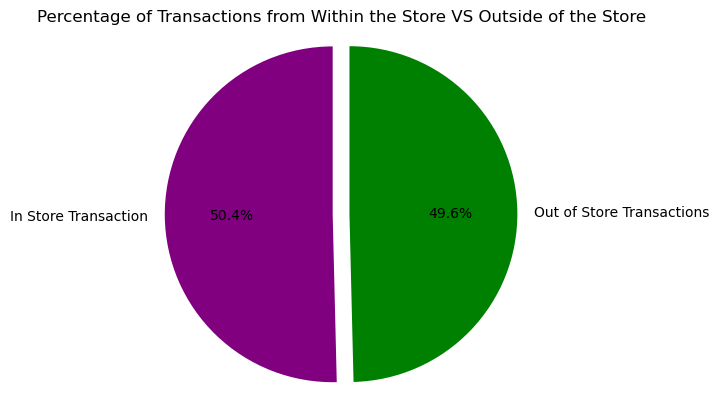

In [1022]:
labels = 'In Store Transaction', 'Out of Store Transactions'
sizes = [24992, 24608]
colors = ['purple', 'green']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Transactions from Within the Store VS Outside of the Store')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [1024]:
spend.info() #customer info including generation and sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24852 entries, 0 to 24851
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          24852 non-null  int64  
 1   home_store           24852 non-null  int64  
 2   customer_first-name  24852 non-null  object 
 3   customer_email       24852 non-null  object 
 4   customer_since       24852 non-null  object 
 5   loyalty_card_number  24852 non-null  object 
 6   birthdate            24852 non-null  object 
 7   gender               24852 non-null  object 
 8   birth_year           24852 non-null  int64  
 9   generation           24852 non-null  object 
 10  transaction_id       24852 non-null  int64  
 11  transaction_date     24852 non-null  object 
 12  transaction_time     24852 non-null  object 
 13  sales_outlet_id      24852 non-null  int64  
 14  staff_id             24852 non-null  int64  
 15  instore_yn           24852 non-null 

In [1038]:
spend['quantity']= (sales['quantity'].astype(float))
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24852 entries, 0 to 24851
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          24852 non-null  int64  
 1   home_store           24852 non-null  int64  
 2   customer_first-name  24852 non-null  object 
 3   customer_email       24852 non-null  object 
 4   customer_since       24852 non-null  object 
 5   loyalty_card_number  24852 non-null  object 
 6   birthdate            24852 non-null  object 
 7   gender               24852 non-null  object 
 8   birth_year           24852 non-null  int64  
 9   generation           24852 non-null  object 
 10  transaction_id       24852 non-null  int64  
 11  transaction_date     24852 non-null  object 
 12  transaction_time     24852 non-null  object 
 13  sales_outlet_id      24852 non-null  int64  
 14  staff_id             24852 non-null  int64  
 15  instore_yn           24852 non-null 

In [1056]:
loy_gen = customer_spend[['customer_id', 'customer_since', 'loyalty_card_number', 'generation']]
loy_gen.sort_values('customer_since', ascending=True)

,customer_id,customer_since,loyalty_card_number,generation
2038,8294,2017-01-03,385-899-7846,Younger Millennials
2227,8483,2017-01-03,871-571-3263,Baby Boomers
0,1,2017-01-04,908-424-2890,Baby Boomers
1535,5736,2017-01-04,467-260-7574,Older Millennials
300,301,2017-01-04,021-443-0682,Baby Boomers
...,...,...,...,...
1644,5845,2019-04-09,905-921-1109,Gen Z
844,5045,2019-04-09,141-386-1471,Gen Z
699,700,2019-04-09,337-201-6353,Gen Z
299,300,2019-04-09,971-834-8561,Gen Z


In [1052]:
loy_gen['generation'].value_counts()

generation
Baby Boomers           529
Gen X                  522
Older Millennials      515
Gen Z                  382
Younger Millennials    298
Name: count, dtype: int64

In [1067]:
pd.to_datetime(loy_gen['customer_since']).iso
loy_gen

AttributeError: 'Series' object has no attribute 'iso'

In [1063]:
loy_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   customer_since       2246 non-null   object
 2   loyalty_card_number  2246 non-null   object
 3   generation           2246 non-null   object
dtypes: int64(1), object(3)
memory usage: 70.3+ KB


In [ ]:
212798198d5d5e1f7a1324f826a4269d